# PyPI qqman GWAS plots 

Post commmon PCA QC

Filter SNPs MAF < 0.005

#### User supplied variables

In [1]:
DIR_GWAS = "/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_PCA_QC/GWAS/maf_rare_0.005"
GWAS_NAME = "psp_adsp.common_PCA.pass_qc.maf_rare_005"

DIR_PLOT = "/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_PCA_QC/GWAS/maf_rare_0.005/pypi_qqman"

MAF_STR = "PSP-ADSP MAF < 0.005"

#### imports

In [2]:
import os
import pandas as pd
from qqman import qqman
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### setup variables

In [3]:
GWAS_PREFIX = os.path.join(DIR_GWAS, GWAS_NAME)
PLOT_PREFIX = os.path.join(DIR_PLOT, GWAS_NAME)


## GWAS variables
MODEL_NAME_0 = ".assoc._no_covar"
MODEL_NAME_1 = ".logistic._no_covar"
MODEL_NAME_2 = ".logistic.covar_PC1"
MODEL_NAME_3 = ".logistic.covar_PC1-PC2"
MODEL_NAME_4 = ".logistic.covar_PC1-PC2-PC3"
MODEL_NAME_5 = ".logistic.covar_PC1-PC2-PC3-H1H2"
MODEL_NAME_6 = ".logistic.covar_PC1-H1H2"
MODEL_NAME_7 = ".logistic.covar_H1H2"

COVAR_STR_0 = "--assoc no covar"
COVAR_STR_1 = "--logistic no covar"
COVAR_STR_2 = "PC01"
COVAR_STR_3 = "PC01,PC02"
COVAR_STR_4 = "PC01,PC02,PC03"
COVAR_STR_5 = "PC01,PC02,PC03,H1H2_dosage"
COVAR_STR_6 = "PC01,H1H2_dosage"
COVAR_STR_7 = "H1H2_dosage"

In [4]:
!mkdir -p {DIR_PLOT}


## plot --assoc  (no covar)

'.assoc._no_covar'

'--assoc no covar'

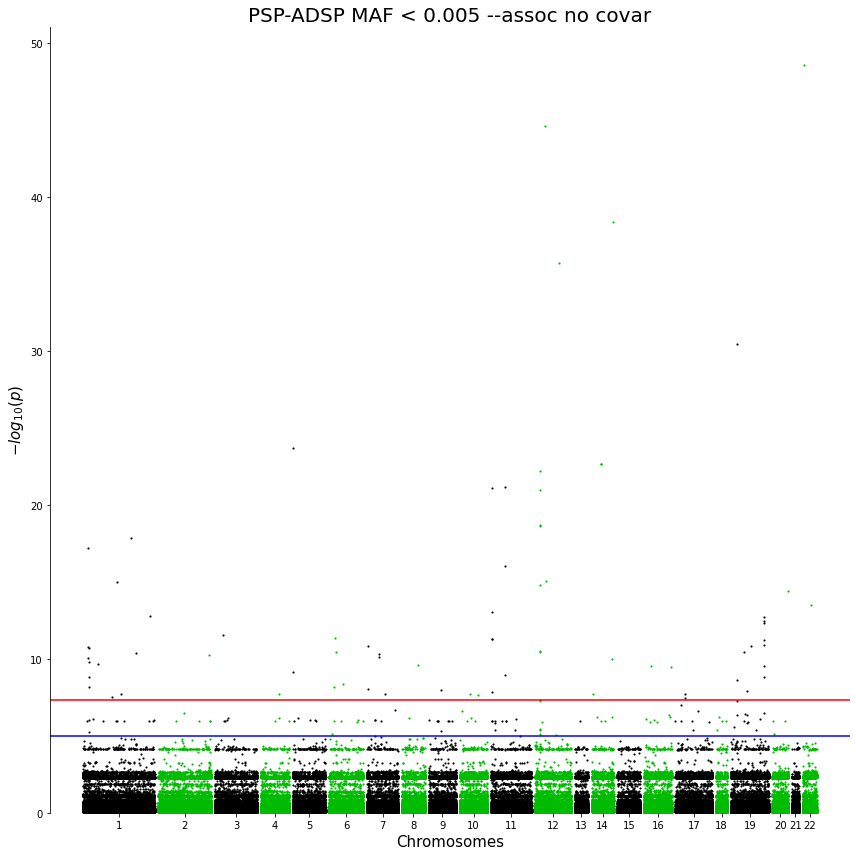

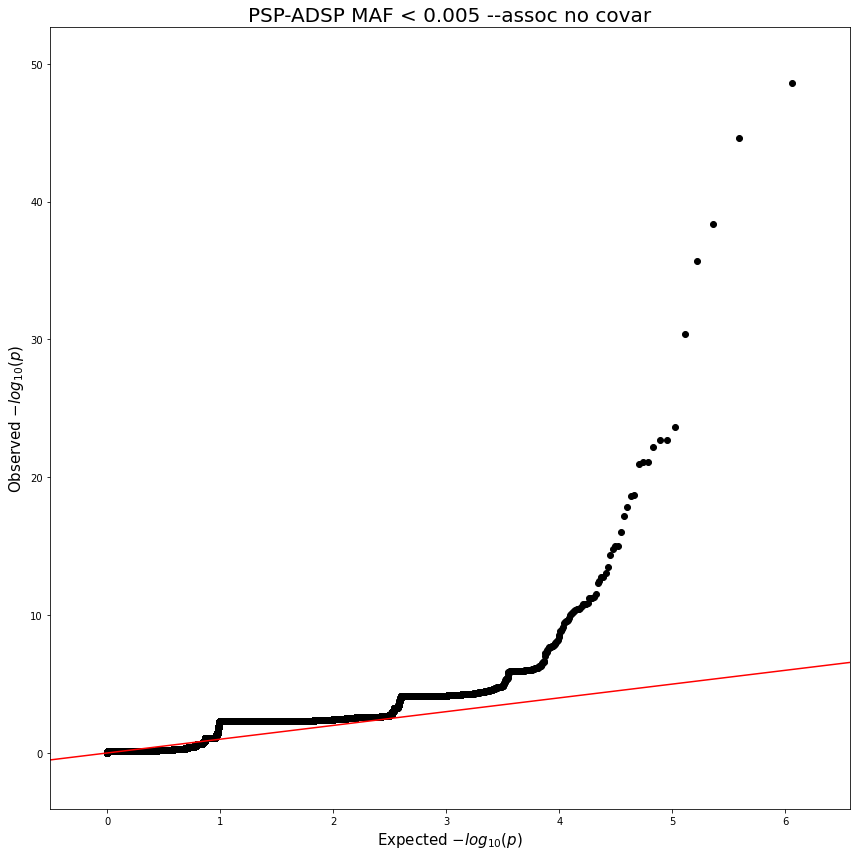

In [5]:
MODEL_NAME_0
COVAR_STR_0

qqman.manhattan(GWAS_PREFIX+MODEL_NAME_0+'.assoc', 
                out=PLOT_PREFIX+MODEL_NAME_0+'.assoc.Manhattan.png', 
                show=True, 
                title=MAF_STR + ' ' + COVAR_STR_0, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(GWAS_PREFIX+MODEL_NAME_0+'.assoc', 
                out=PLOT_PREFIX+MODEL_NAME_0+'.assoc.qqplot.png', 
                show=True, 
                title=MAF_STR + ' ' + COVAR_STR_0)


In [6]:
## write plot files
qqman.manhattan(GWAS_PREFIX+MODEL_NAME_0+'.assoc', 
                out=PLOT_PREFIX+MODEL_NAME_0+'.assoc.Manhattan.png', 
                show=False, 
                title=MAF_STR + ' ' + COVAR_STR_0, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(GWAS_PREFIX+MODEL_NAME_0+'.assoc', 
                out=PLOT_PREFIX+MODEL_NAME_0+'.assoc.qqplot.png', 
                show=False, 
                title=MAF_STR + ' ' + COVAR_STR_0)

<br>  
## PLINK --logistic v1: no covar

In [7]:
df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_1+'.assoc.logistic', header=0, delim_whitespace=True)
pval_model_1 = list(df_assoc['P'])
del df_assoc

In [8]:
df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_1+'.assoc.logistic.adjusted', header=0, delim_whitespace=True)
pval_model_1_adj = list(df_assoc['QQ'])
del df_assoc

'.logistic._no_covar'

'--logistic no covar'

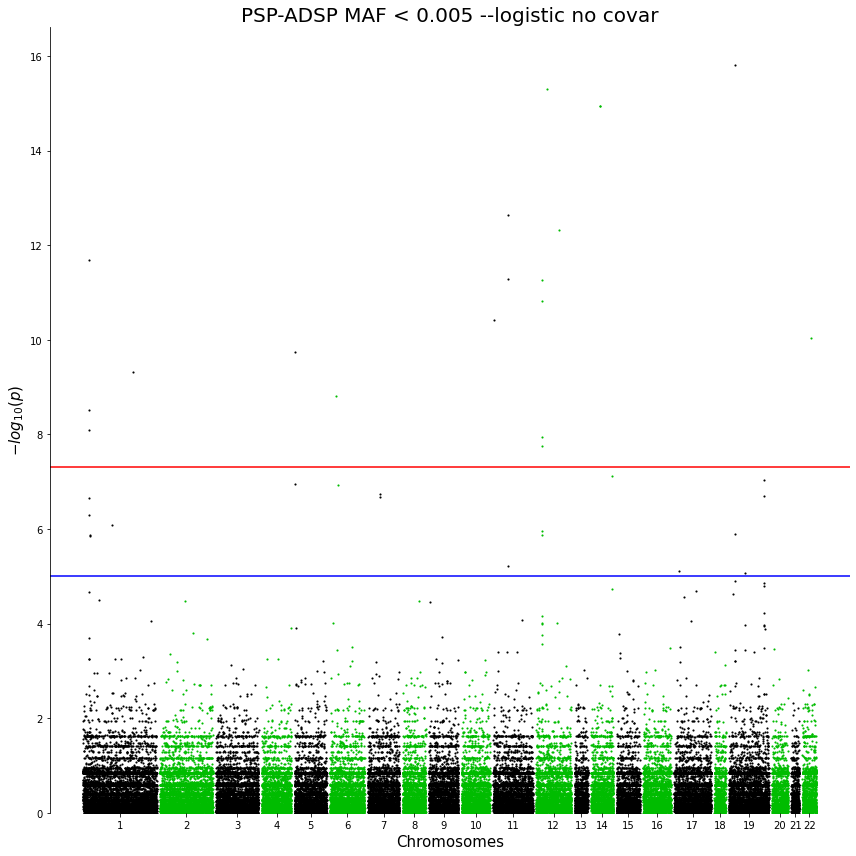

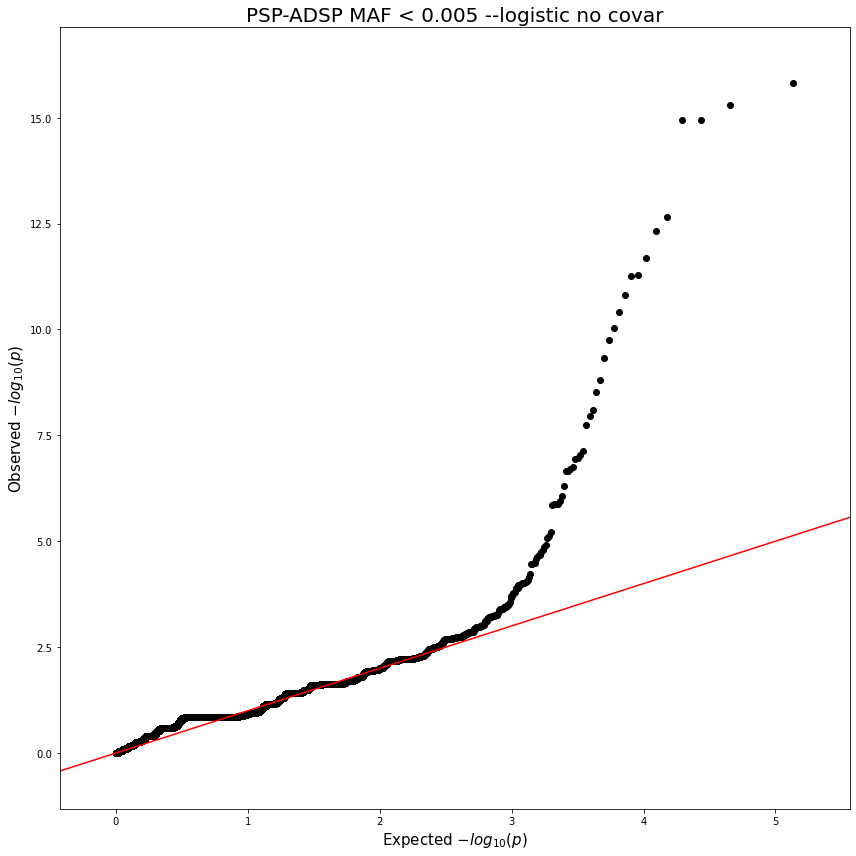

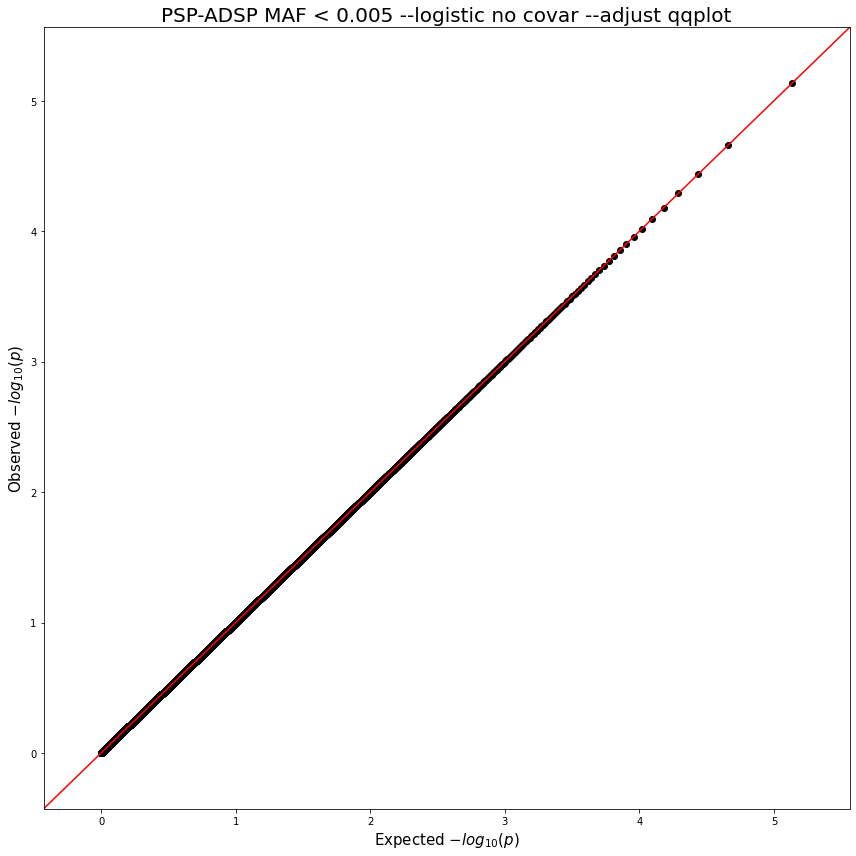

In [9]:
## --logistic v1: no covar
MODEL_NAME_1
COVAR_STR_1

## reformat --logistic output file for qqplot
df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_1+'.assoc.logistic', header=0, delim_whitespace=True)
pval_model_1 = list(df_assoc['P'])
del df_assoc

qqman.manhattan(GWAS_PREFIX+MODEL_NAME_1+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_1+'.assoc.Manhattan.png', 
                show=True, 
                title=MAF_STR + ' ' + COVAR_STR_1, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_1, 
             out=PLOT_PREFIX+MODEL_NAME_1+'.assoc.logistic.qqplot.png', 
             show=True, 
             title=MAF_STR + ' ' + COVAR_STR_1)

qqman.qqplot(pval_model_1_adj, 
             out=PLOT_PREFIX+MODEL_NAME_1+'.assoc.logistic.qqplot.adjusted.png', 
             show=True, 
             title=MAF_STR + ' ' + COVAR_STR_1 +' --adjust qqplot')


In [10]:
## write plot files
qqman.manhattan(GWAS_PREFIX+MODEL_NAME_1+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_1+'.assoc.Manhattan.png', 
                show=False, 
                title=MAF_STR + ' ' + COVAR_STR_1, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_1, 
             out=PLOT_PREFIX+MODEL_NAME_1+'.assoc.logistic.qqplot.png', 
             show=False, 
             title=MAF_STR + ' ' + COVAR_STR_1)

qqman.qqplot(pval_model_1_adj, 
             out=PLOT_PREFIX+MODEL_NAME_1+'.assoc.logistic.qqplot.adjusted.png', 
             show=False, 
             title=MAF_STR + ' ' + COVAR_STR_1 +' --adjust qqplot')

del pval_model_1
del pval_model_1_adj

<br>  
## PLINK --logistic v2: covar = PC1

'.logistic.covar_PC1'

'PC01'

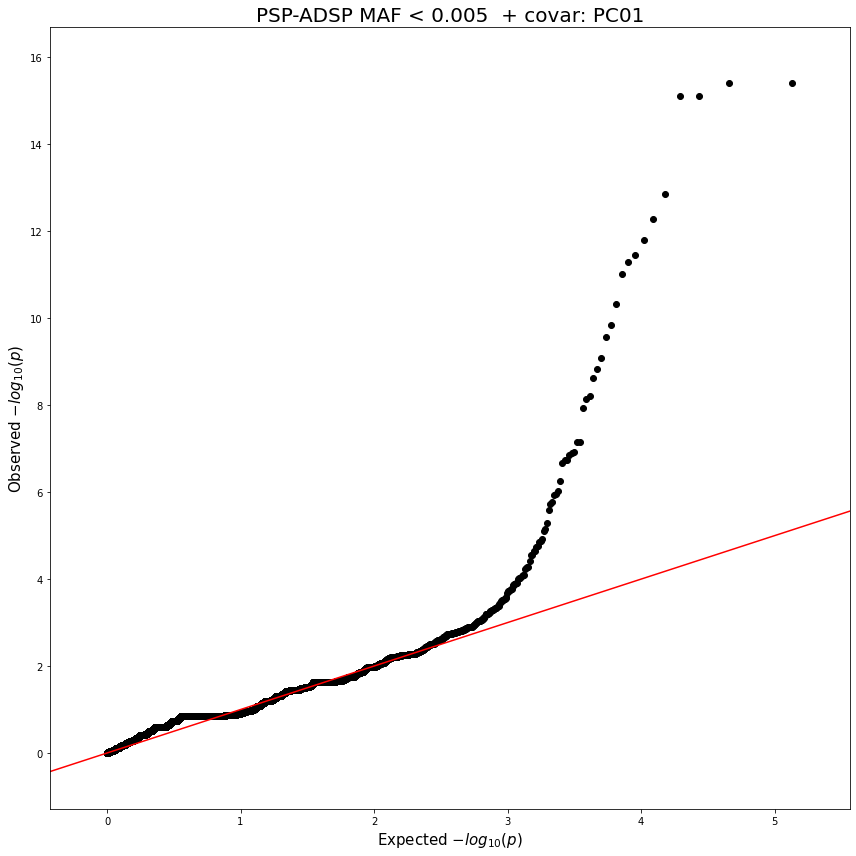

In [11]:
## --logistic v2: covar = PC1
MODEL_NAME_2
COVAR_STR_2

## reformat --logistic output file for qqplot
df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_2+'.assoc.logistic', header=0, delim_whitespace=True)
pval_model_2 = list(df_assoc['P'])
del df_assoc

qqman.manhattan(GWAS_PREFIX+MODEL_NAME_2+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_2+'.assoc.Manhattan.png', 
                show=True, 
                title=MAF_STR + '  + covar: ' + COVAR_STR_2, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_2, 
             out=PLOT_PREFIX+MODEL_NAME_2+'.assoc.logistic.qqplot.png', 
             show=True, 
             title=MAF_STR + '  + covar: ' + COVAR_STR_2)


In [12]:
## write plot files
qqman.manhattan(GWAS_PREFIX+MODEL_NAME_2+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_2+'.assoc.Manhattan.png', 
                show=False, 
                title=MAF_STR + '  + covar: ' + COVAR_STR_2, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_2, 
             out=PLOT_PREFIX+MODEL_NAME_2+'.assoc.logistic.qqplot.png', 
             show=False, 
             title=MAF_STR + '  + covar: ' + COVAR_STR_2)

del pval_model_2

<br>  

# <font color='red'> _NOTE: when more than one PC included as covar --> ALL SNPs have `P = NA` in .assoc.logistic_  </font>  


#### each PC alone works, +/- H1H2 dosage  

    
Combinations tested that result in no valid tests / all NA:  
- PC1 + PC2  
- PC1 + PC3  
- PC2 + PC3  
- PC1 + PC2 + PC3  
- PC1 + PC2 + PC3 + H1H2  
- PC2 + PC3 + H1H2  


## <font color='blue'> _==> skip PC1+PC2, PC1+PC2+PC3 & PC1+PC2+PC3+H1H2 models for now..._

<br>  
## PLINK --logistic v3: covar = PC1, PC2

In [13]:
# ## --logistic v3: covar = PC1,PC2
# MODEL_NAME_3
# COVAR_STR_3

# ## reformat --logistic output file for qqplot
# df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_3+'.assoc.logistic', header=0, delim_whitespace=True)
# pval_model_3 = list(df_assoc['P'])
# del df_assoc

# qqman.manhattan(GWAS_PREFIX+MODEL_NAME_3+'.assoc.logistic', 
#                 out=PLOT_PREFIX+MODEL_NAME_3+'.assoc.Manhattan.png', 
#                 show=True, 
#                 title=MAF_STR + '  + covar: ' + COVAR_STR_3, 
#                 cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

# qqman.qqplot(pval_model_3, 
#              out=PLOT_PREFIX+MODEL_NAME_3+'.assoc.logistic.qqplot.png', 
#              show=True, 
#              title=MAF_STR + '  + covar: ' + COVAR_STR_3)


In [14]:
# ## write plot files
# qqman.manhattan(GWAS_PREFIX+MODEL_NAME_3+'.assoc.logistic', 
#                 out=PLOT_PREFIX+MODEL_NAME_3+'.assoc.Manhattan.png', 
#                 show=False, 
#                 title=MAF_STR + '  + covar: ' + COVAR_STR_3, 
#                 cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

# qqman.qqplot(pval_model_3, 
#              out=PLOT_PREFIX+MODEL_NAME_3+'.assoc.logistic.qqplot.png', 
#              show=False, 
#              title=MAF_STR + '  + covar: ' + COVAR_STR_3)

# del pval_model_3

<br>  
## PLINK --logistic v4: covar = PC1, PC2, PC3

In [15]:
# ## --logistic v4: covar = PC1,PC2,PC3
# MODEL_NAME_4
# COVAR_STR_4


# ## reformat --logistic output file for qqplot
# df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_4+'.assoc.logistic', header=0, delim_whitespace=True)
# pval_model_4 = list(df_assoc['P'])
# del df_assoc

# qqman.manhattan(GWAS_PREFIX+MODEL_NAME_4+'.assoc.logistic', 
#                 out=PLOT_PREFIX+MODEL_NAME_4+'.assoc.Manhattan.png', 
#                 show=True, 
#                 title=MAF_STR + '  + covar: ' + COVAR_STR_4, 
#                 cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

# qqman.qqplot(pval_model_4, 
#              out=PLOT_PREFIX+MODEL_NAME_4+'.assoc.logistic.qqplot.png', 
#              show=True, 
#              title=MAF_STR + '  + covar: ' + COVAR_STR_4)


In [16]:
# ## write plot files
# qqman.manhattan(GWAS_PREFIX+MODEL_NAME_4+'.assoc.logistic', 
#                 out=PLOT_PREFIX+MODEL_NAME_4+'.assoc.Manhattan.png', 
#                 show=False, 
#                 title=MAF_STR + '  + covar: ' + COVAR_STR_4, 
#                 cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

# qqman.qqplot(pval_model_4, 
#              out=PLOT_PREFIX+MODEL_NAME_4+'.assoc.logistic.qqplot.png', 
#              show=False, 
#              title=MAF_STR + '  + covar: ' + COVAR_STR_4)

<br>  
## PLINK --logistic v5: covar = PC1, PC2, PC3, H1H2

In [17]:
# ## --logistic v5: covar = PC1,PC2,PC3,H1H2
# MODEL_NAME_5
# COVAR_STR_5

# ## reformat --logistic output file for qqplot
# df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_5+'.assoc.logistic', header=0, delim_whitespace=True)
# pval_model_5 = list(df_assoc['P'])
# del df_assoc

# qqman.manhattan(GWAS_PREFIX+MODEL_NAME_5+'.assoc.logistic', 
#                 out=PLOT_PREFIX+MODEL_NAME_5+'.assoc.Manhattan.png', 
#                 show=True, 
#                 title=MAF_STR + '  + covar: ' + COVAR_STR_5, 
#                 cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

# qqman.qqplot(pval_model_5, 
#              out=PLOT_PREFIX+MODEL_NAME_5+'.assoc.logistic.qqplot.png', 
#              show=True, 
#              title=MAF_STR + '  + covar: ' + COVAR_STR_5)


In [18]:
# ## write plot files
# qqman.manhattan(GWAS_PREFIX+MODEL_NAME_5+'.assoc.logistic', 
#                 out=PLOT_PREFIX+MODEL_NAME_5+'.assoc.Manhattan.png', 
#                 show=False, 
#                 title=MAF_STR + '  + covar: ' + COVAR_STR_5, 
#                 cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

# qqman.qqplot(pval_model_5, 
#              out=PLOT_PREFIX+MODEL_NAME_5+'.assoc.logistic.qqplot.png', 
#              show=False, 
#              title=MAF_STR + '  + covar: ' + COVAR_STR_5)

# del pval_model_5

<br>  
## PLINK --logistic v6: covar = PC1, H1H2

'.logistic.covar_PC1-H1H2'

'PC01,H1H2_dosage'

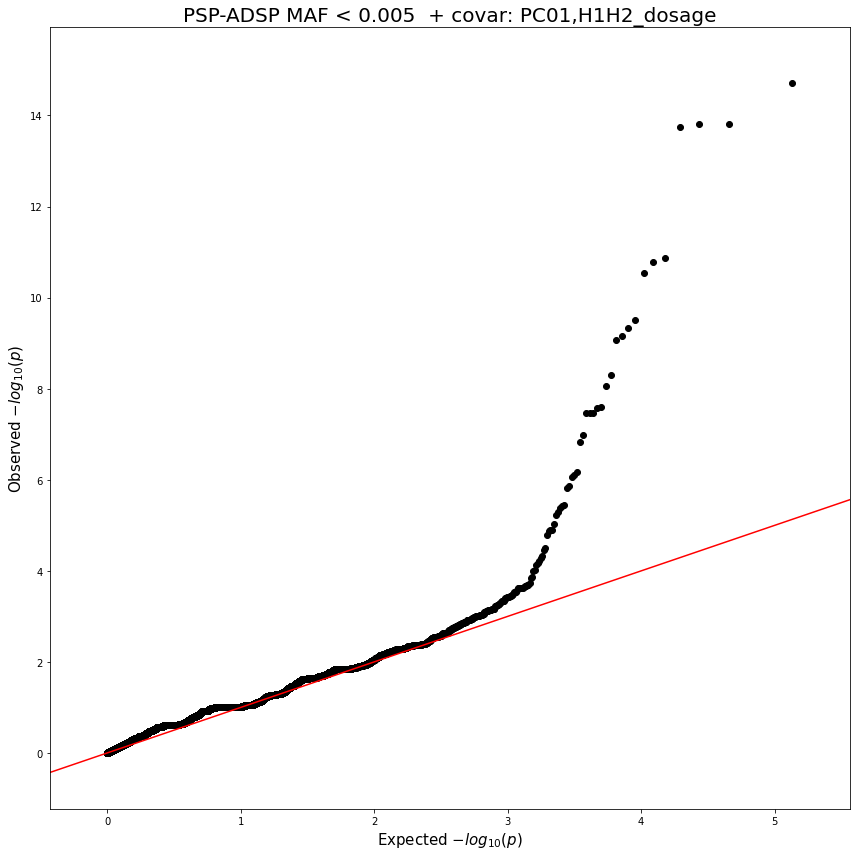

In [19]:
## --logistic v5: covar = PC1,H1H2
MODEL_NAME_6
COVAR_STR_6


## reformat --logistic output file for qqplot
df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_6+'.assoc.logistic', header=0, delim_whitespace=True)
pval_model_6 = list(df_assoc['P'])
del df_assoc

qqman.manhattan(GWAS_PREFIX+MODEL_NAME_6+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_6+'.assoc.Manhattan.png', 
                show=True, 
                title=MAF_STR + '  + covar: ' + COVAR_STR_6, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_6, 
             out=PLOT_PREFIX+MODEL_NAME_6+'.assoc.logistic.qqplot.png', 
             show=True, 
             title=MAF_STR + '  + covar: ' + COVAR_STR_6)


In [20]:
## write plot files
qqman.manhattan(GWAS_PREFIX+MODEL_NAME_6+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_6+'.assoc.Manhattan.png', 
                show=False, 
                title=MAF_STR + '  + covar: ' + COVAR_STR_6, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_6, 
             out=PLOT_PREFIX+MODEL_NAME_6+'.assoc.logistic.qqplot.png', 
             show=False, 
             title=MAF_STR + '  + covar: ' + COVAR_STR_6)

<br>  
## PLINK --logistic v7: covar = H1H2

'.logistic.covar_H1H2'

'H1H2_dosage'

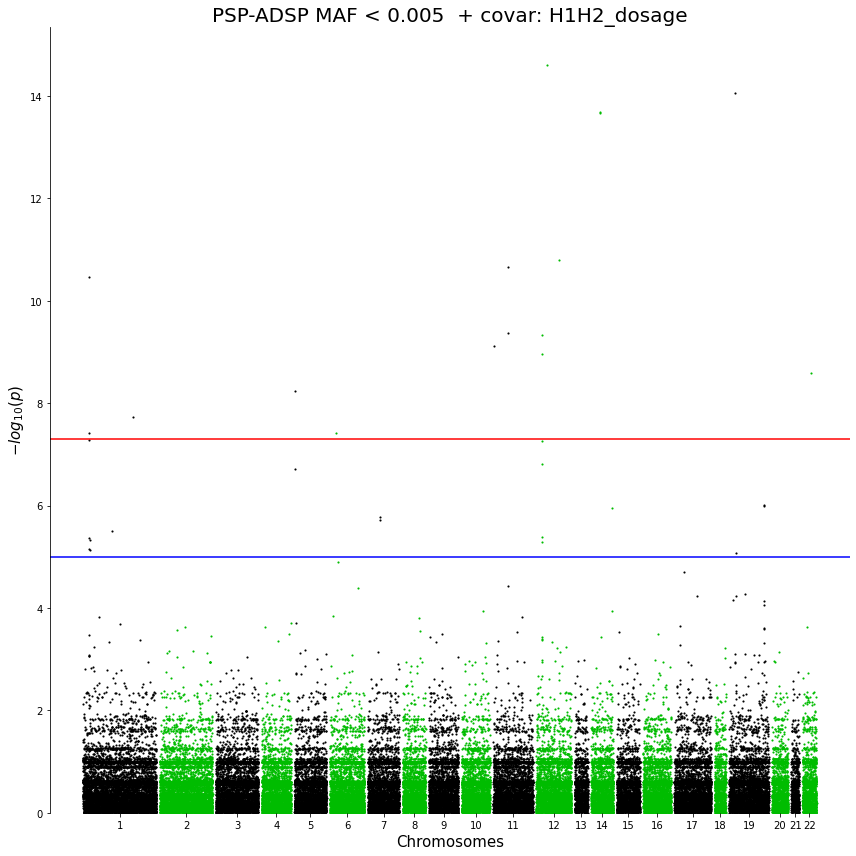

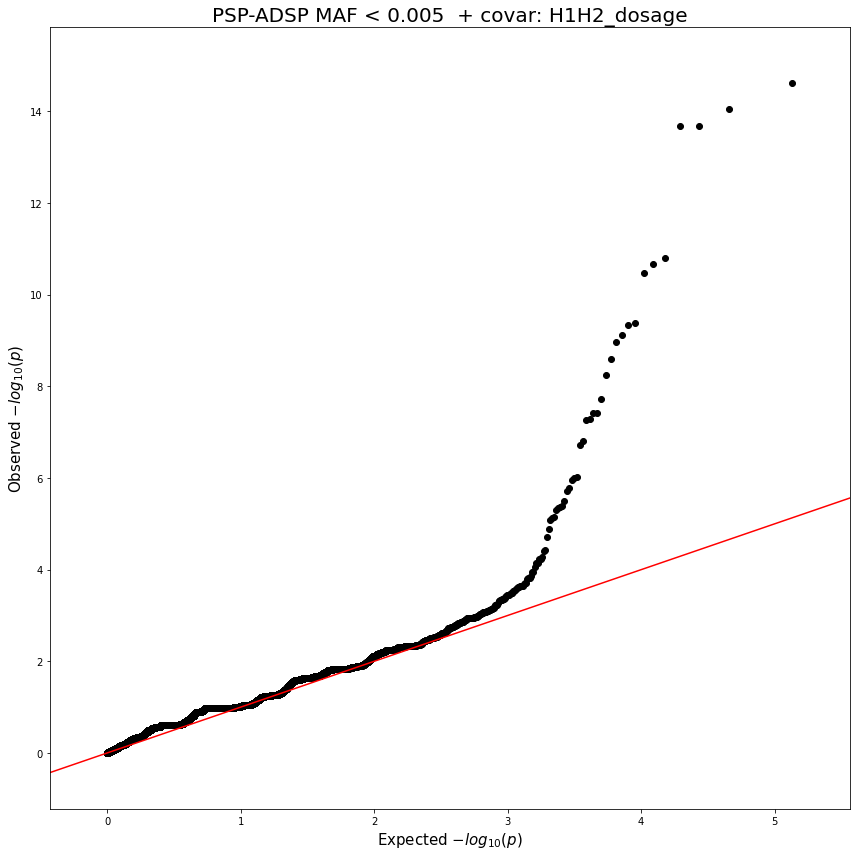

In [21]:
## --logistic v7: covar = H1H2
MODEL_NAME_7
COVAR_STR_7

## reformat --logistic output file for qqplot
df_assoc = pd.read_csv(GWAS_PREFIX+MODEL_NAME_7+'.assoc.logistic', header=0, delim_whitespace=True)
pval_model_7 = list(df_assoc['P'])
del df_assoc

qqman.manhattan(GWAS_PREFIX+MODEL_NAME_7+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_7+'.assoc.Manhattan.png', 
                show=True, 
                title=MAF_STR + '  + covar: ' + COVAR_STR_7, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_7, 
             out=PLOT_PREFIX+MODEL_NAME_7+'.assoc.logistic.qqplot.png', 
             show=True, 
             title=MAF_STR + '  + covar: ' + COVAR_STR_7)


In [22]:
## write plot files
qqman.manhattan(GWAS_PREFIX+MODEL_NAME_7+'.assoc.logistic', 
                out=PLOT_PREFIX+MODEL_NAME_7+'.assoc.Manhattan.png', 
                show=False, 
                title=MAF_STR + '  + covar: ' + COVAR_STR_7, 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_model_7, 
             out=PLOT_PREFIX+MODEL_NAME_7+'.assoc.logistic.qqplot.png', 
             show=False, 
             title=MAF_STR + '  + covar: ' + COVAR_STR_7)
